In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('disease_outbreak_data.csv')
print(data)

      region_id region_type  population_density  median_income  \
0             0    Suburban         1926.071460   59715.328072   
1             1    Suburban         1099.791458   46234.340479   
2             2       Urban         5961.415281   62338.173682   
3             3       Rural          274.449145   56912.244502   
4             4    Suburban          643.115175   72034.119281   
...         ...         ...                 ...            ...   
9995       9995    Suburban          604.578638   69777.578677   
9996       9996    Suburban         1742.541805   32361.655154   
9997       9997       Rural          409.219976   44412.254477   
9998       9998       Rural          130.823003   43109.431704   
9999       9999       Rural          143.175027   66136.610363   

      elderly_percentage  child_percentage  hospitals_per_100k  \
0              13.120373         16.559945            1.587125   
1              22.367720         18.824620            2.974846   
2        

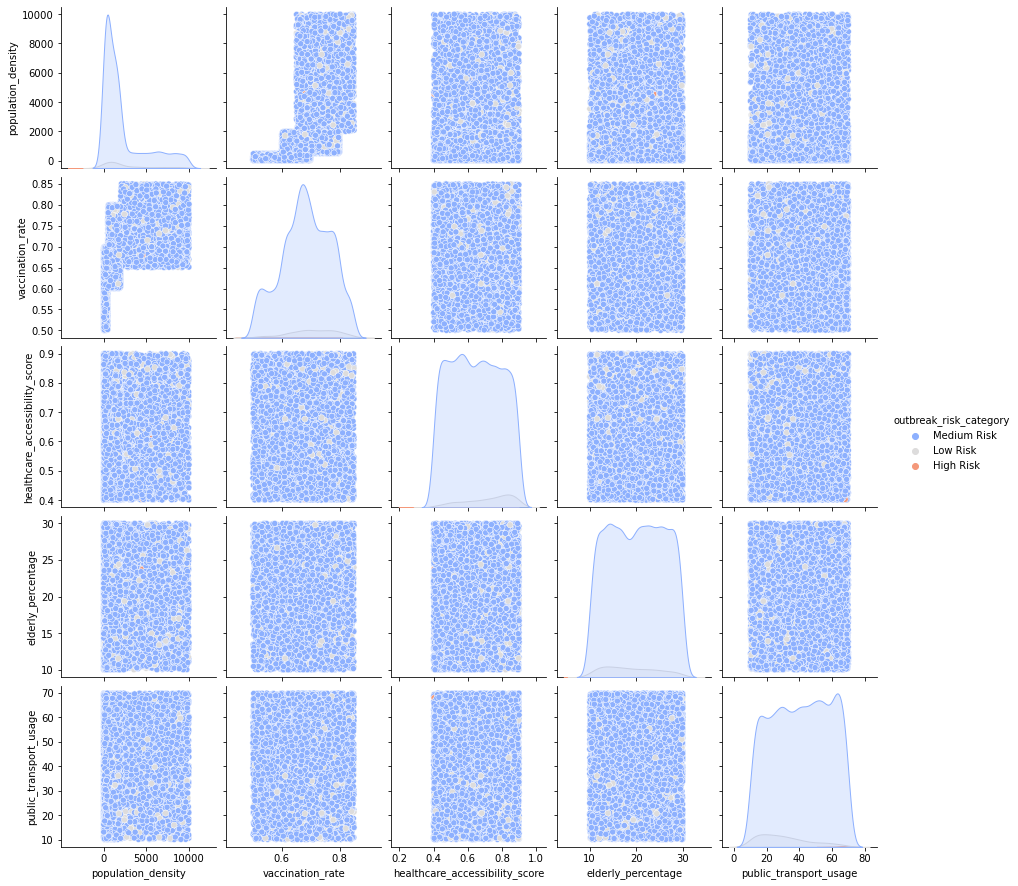

In [37]:
data1 = pd.read_csv('disease_outbreak_data.csv')
import seaborn as sns
sns.pairplot(data1[['population_density', 'vaccination_rate', 'healthcare_accessibility_score',
                   'elderly_percentage', 'public_transport_usage','outbreak_risk_category']], hue='outbreak_risk_category', palette="coolwarm")
plt.show()


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   region_id                       10000 non-null  int64  
 1   region_type                     10000 non-null  object 
 2   population_density              10000 non-null  float64
 3   median_income                   10000 non-null  float64
 4   elderly_percentage              10000 non-null  float64
 5   child_percentage                10000 non-null  float64
 6   hospitals_per_100k              10000 non-null  float64
 7   vaccination_rate                9500 non-null   float64
 8   healthcare_accessibility_score  9500 non-null   float64
 9   avg_temperature                 10000 non-null  float64
 10  avg_humidity                    10000 non-null  float64
 11  annual_rainfall                 10000 non-null  float64
 12  air_quality_index               1

In [4]:
# Filling missing values with the mean of the respective columns
data['vaccination_rate'].fillna(data['vaccination_rate'].mean(), inplace=True)
data['healthcare_accessibility_score'].fillna(data['healthcare_accessibility_score'].mean(), inplace=True)

# Display the updated DataFrame to verify
print(data.isnull().sum())  # Check for remaining null values


region_id                         0
region_type                       0
population_density                0
median_income                     0
elderly_percentage                0
child_percentage                  0
hospitals_per_100k                0
vaccination_rate                  0
healthcare_accessibility_score    0
avg_temperature                   0
avg_humidity                      0
annual_rainfall                   0
air_quality_index                 0
disease_incidents_last_year       0
outbreak_frequency_5years         0
avg_outbreak_duration             0
daily_commuter_percentage         0
international_travel_freq         0
public_transport_usage            0
risk_score                        0
outbreak_risk_category            0
dtype: int64


In [5]:
# Check data types
print(data.dtypes)


region_id                           int64
region_type                        object
population_density                float64
median_income                     float64
elderly_percentage                float64
child_percentage                  float64
hospitals_per_100k                float64
vaccination_rate                  float64
healthcare_accessibility_score    float64
avg_temperature                   float64
avg_humidity                      float64
annual_rainfall                   float64
air_quality_index                 float64
disease_incidents_last_year         int64
outbreak_frequency_5years           int64
avg_outbreak_duration             float64
daily_commuter_percentage         float64
international_travel_freq         float64
public_transport_usage            float64
risk_score                        float64
outbreak_risk_category             object
dtype: object


In [6]:
# Unique values in each column
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {data[col].unique()}")


Unique values in region_type: ['Suburban' 'Urban' 'Rural']
Unique values in outbreak_risk_category: ['Medium Risk' 'Low Risk' 'High Risk']


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'region_type'
data['region_type'] = label_encoder.fit_transform(data['region_type'])

# Encode 'outbreak_risk_category'
data['outbreak_risk_category'] = label_encoder.fit_transform(data['outbreak_risk_category'])

# Check encoded values
print(data.head())


   region_id  region_type  population_density  median_income  \
0          0            1         1926.071460   59715.328072   
1          1            1         1099.791458   46234.340479   
2          2            2         5961.415281   62338.173682   
3          3            0          274.449145   56912.244502   
4          4            1          643.115175   72034.119281   

   elderly_percentage  child_percentage  hospitals_per_100k  vaccination_rate  \
0           13.120373         16.559945            1.587125          0.773235   
1           22.367720         18.824620            2.974846          0.693353   
2           16.234222         20.200680            3.866776          0.686971   
3           22.140685         17.759992            0.796274          0.533053   
4           23.318447         20.912978            1.912083          0.712249   

   healthcare_accessibility_score  avg_temperature  ...  annual_rainfall  \
0                        0.700558        27.615149  

In [8]:
# Check for duplicate rows
print(data.duplicated().sum())


0


In [9]:
# Check if numeric columns contain non-numeric values
for col in data.select_dtypes(include=['float', 'int']).columns:
    non_numeric = data[pd.to_numeric(data[col], errors='coerce').isnull()]
    if not non_numeric.empty:
        print(f"Inconsistent values found in {col}:")
        print(non_numeric[col])


In [10]:
# Check data types
print(data.dtypes)

region_id                           int64
region_type                         int32
population_density                float64
median_income                     float64
elderly_percentage                float64
child_percentage                  float64
hospitals_per_100k                float64
vaccination_rate                  float64
healthcare_accessibility_score    float64
avg_temperature                   float64
avg_humidity                      float64
annual_rainfall                   float64
air_quality_index                 float64
disease_incidents_last_year         int64
outbreak_frequency_5years           int64
avg_outbreak_duration             float64
daily_commuter_percentage         float64
international_travel_freq         float64
public_transport_usage            float64
risk_score                        float64
outbreak_risk_category              int32
dtype: object


In [11]:
!pip install imbalanced-learn

In [12]:
print(data['outbreak_risk_category'].value_counts())

2    9455
1     538
0       7
Name: outbreak_risk_category, dtype: int64


In [13]:
from sklearn.preprocessing import StandardScaler

# List of columns to scale
fields_to_scale = [
    'population_density', 'median_income', 'avg_temperature',
    'avg_humidity', 'annual_rainfall', 'air_quality_index',
    'disease_incidents_last_year', 'outbreak_frequency_5years',
    'avg_outbreak_duration', 'international_travel_freq'
]

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
data[fields_to_scale] = scaler.fit_transform(data[fields_to_scale])

data.head(10)

,region_id,region_type,population_density,median_income,elderly_percentage,child_percentage,hospitals_per_100k,vaccination_rate,healthcare_accessibility_score,avg_temperature,...,annual_rainfall,air_quality_index,disease_incidents_last_year,outbreak_frequency_5years,avg_outbreak_duration,daily_commuter_percentage,international_travel_freq,public_transport_usage,risk_score,outbreak_risk_category
0,0,1,-0.152280,0.649754,13.120373,16.559945,1.587125,0.773235,0.700558,1.510395,...,-1.664833,1.114094,1.109285,-0.190591,0.391284,44.466126,-1.735545,11.383746,38.671740,2
1,1,1,-0.458470,-0.252261,22.367720,18.824620,2.974846,0.693353,0.829970,-0.169270,...,-0.169915,-1.310584,2.118597,1.556345,-0.692285,23.906885,0.620328,36.409150,38.168486,2
2,2,2,1.343079,0.825249,16.234222,20.200680,3.866776,0.686971,0.884792,-1.221715,...,1.530455,0.923792,0.301835,0.857571,0.228377,40.833370,1.583802,60.672031,54.447595,2
3,3,0,-0.764314,0.462200,22.140685,17.759992,0.796274,0.533053,0.407818,0.079450,...,-0.363312,-0.600340,0.604629,-0.190591,1.460831,46.043081,1.423029,61.002315,45.836201,2
4,4,1,-0.627699,1.474007,23.318447,20.912978,1.912083,0.712249,0.591463,-1.125185,...,1.215468,0.485065,-0.808409,1.206958,0.714003,24.435633,-0.231671,22.103152,48.289559,2
5,5,0,-0.775993,1.800534,12.786629,21.044174,1.039841,0.540612,0.871427,0.572095,...,0.679525,0.887397,0.402766,-0.190591,1.270900,52.146883,-1.111049,63.553540,43.106176,2
6,6,1,-0.231918,-0.310718,12.201038,17.279352,2.140662,0.763603,0.830365,0.664134,...,0.039582,-0.286250,-0.909340,0.857571,1.518353,32.928117,0.044751,52.181138,33.729875,2
7,7,1,-0.140569,-1.926079,15.696810,15.368869,2.414347,0.684862,0.649183,-0.032506,...,1.421850,-0.737020,-1.212134,0.158796,-0.908946,46.885422,0.889557,24.258253,36.870424,2
8,8,0,-0.795528,1.410038,20.715494,15.902898,1.335302,0.564156,0.493259,1.380251,...,0.318267,0.373126,-0.909340,-0.539978,1.510088,35.902881,0.041136,60.262606,41.642408,2
9,9,1,-0.272064,0.206101,23.915688,17.285500,1.762432,0.796434,0.658318,-1.443400,...,1.727805,1.102712,0.200904,0.508184,-0.573090,33.968383,0.765481,63.826616,48.537662,2


In [14]:
# Import necessary libraries
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=["outbreak_risk_category"])  # Features
y = data["outbreak_risk_category"]  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

# Apply RandomUnderSampler for undersampling
under_sampler = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = under_sampler.fit_resample(X_train, y_train)

# Print the results
print("Original dataset shape:", X.shape, y.shape)
print("After SMOTE:", X_resampled_smote.shape, y_resampled_smote.shape)
print("After RandomUnderSampler:", X_resampled_under.shape, y_resampled_under.shape)



Original dataset shape: (10000, 20) (10000,)
After SMOTE: (22695, 20) (22695,)
After RandomUnderSampler: (18, 20) (18,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# You can choose to use either resampled data from SMOTE or RandomUnderSampler
# For example, using the SMOTE-resampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict on the test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
print("Model performance with SMOTE resampling:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

# Alternatively, you could use the RandomUnderSampler-resampled data:
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_resampled_under, y_resampled_under)

# Predict on the test set
y_pred_under = model_under.predict(X_test)

# Evaluate the model
print("Model performance with RandomUnderSampler resampling:")
print("Accuracy:", accuracy_score(y_test, y_pred_under))
print("Classification Report:\n", classification_report(y_test, y_pred_under))


Model performance with SMOTE resampling:
Accuracy: 0.9995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.99      1.00      1.00       109
           2       1.00      1.00      1.00      1890

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Model performance with RandomUnderSampler resampling:
Accuracy: 0.882
Classification Report:
               precision    recall  f1-score   support

           0       0.02      1.00      0.04         1
           1       0.36      1.00      0.53       109
           2       1.00      0.88      0.93      1890

    accuracy                           0.88      2000
   macro avg       0.46      0.96      0.50      2000
weighted avg       0.96      0.88      0.91      2000



In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['population_density', 'vaccination_rate', 'healthcare_accessibility_score']])


In [46]:
print(data['cluster'])

0       2
1       2
2       0
3       2
4       2
       ..
9995    2
9996    2
9997    2
9998    2
9999    2
Name: cluster, Length: 10000, dtype: int32


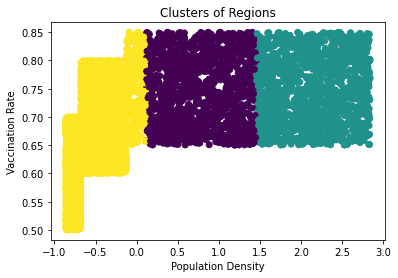

In [47]:
plt.scatter(data['population_density'], data['vaccination_rate'], c=data['cluster'])
plt.xlabel('Population Density')
plt.ylabel('Vaccination Rate')
plt.title('Clusters of Regions')
plt.show()


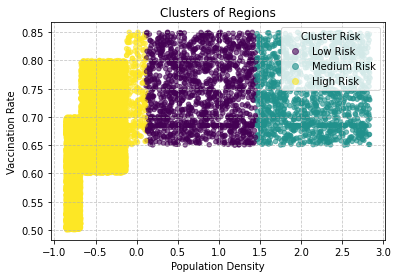

In [48]:
# Define cluster labels
cluster_labels = {
    0: 'Low Risk',
    1: 'Medium Risk',
    2: 'High Risk',
    # Add more as needed
}

# Create scatter plot
scatter = plt.scatter(data['population_density'], data['vaccination_rate'], 
                       c=data['cluster'], cmap='viridis', s=20, alpha=0.6)

# Add legend
handles, _ = scatter.legend_elements()  # Get legend handles
labels = [cluster_labels[i] for i in range(len(handles))]  # Map cluster values to labels
plt.legend(handles, labels, title="Cluster Risk", loc='upper right')

# Add axis labels and title
plt.xlabel('Population Density')
plt.ylabel('Vaccination Rate')
plt.title('Clusters of Regions')
plt.grid(True, linestyle='--', alpha=0.7)  # Add gridlines
plt.show()


In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_under))


[[   1    0    0]
 [   0  109    0]
 [  45  191 1654]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# You can choose to use either resampled data from SMOTE or RandomUnderSampler
# For example, using the SMOTE-resampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_resampled_smote, y_resampled_smote)

# Predict on the test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate the model
print("Model performance with SMOTE resampling:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))

# Alternatively, you could use the RandomUnderSampler-resampled data:
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_resampled_under, y_resampled_under)

# Predict on the test set
y_pred_under = model_under.predict(X_test)

# Evaluate the model
print("Model performance with RandomUnderSampler resampling:")
print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print("Classification Report:\n", classification_report(y_test, y_pred_smote))


Model performance with SMOTE resampling:
Accuracy: 0.9995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.99      1.00      1.00       109
           2       1.00      1.00      1.00      1890

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Model performance with RandomUnderSampler resampling:
Accuracy: 0.9995
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.99      1.00      1.00       109
           2       1.00      1.00      1.00      1890

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [23]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_smote))

[[   1    0    0]
 [   0  109    0]
 [   0    1 1889]]
